# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


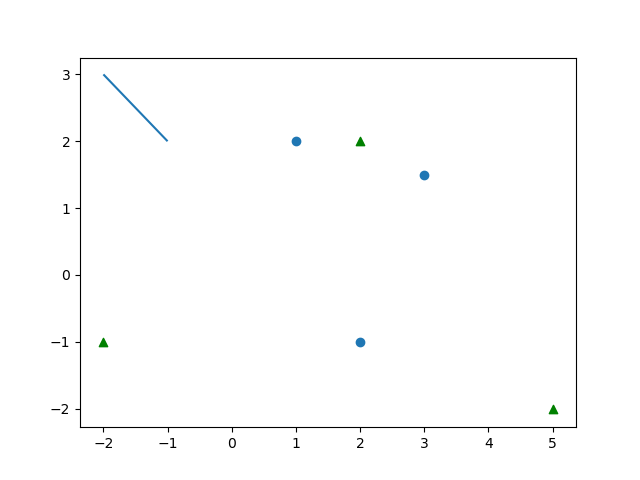

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [4]:
%matplotlib notebook



In [5]:
import random
import math
points = []
points_a = []
points_b = []
points_c = []
points_d = []

# a
def get_points_a(num_of_points, floor, ceil):
    p = []
    for i in range(num_of_points):
        p.append((random.uniform(floor, ceil), random.uniform(floor, ceil)))
    return p

num_of_points = 10**2
floor = -100
ceil = 100
points_a = get_points_a(num_of_points, floor, ceil)

# b
def get_points_b(num_of_points, center, R):
    p = []
    for i in range(num_of_points):
        fi = random.uniform(0, 2*math.pi)
        x = R*math.cos(fi)
        y = R*math.sin(fi)
        p.append((x + center[0], y + center[1]))
    return p
    
num_of_points = 10*2
center = (0, 0)
R = 10
points_b = get_points_b(num_of_points, center, R)
    
# c
def get_points_c(num_of_points, vertices):
    p = []
    for i in range(num_of_points):
        r = random.uniform(-100, 100)
        r2 = random.uniform(-100, 100)
        
        x = 0
        y = 0
        if r > 0:
            if r2 > 0: x = vertices[0][0]
            else: x = vertices[1][0]
            y = random.uniform(vertices[0][1], vertices[2][1])
        else:
            if r2 > 0: y = vertices[0][1]
            else: y = vertices[2][1]
            x = random.uniform(vertices[0][0], vertices[1][0])
        p.append((x, y))
    return p
    
num_of_points = 10**2
# b_l, b_r, t_r, t_l
vertices = [(-10, -10), (10, -10), (10, 10), (-10, 10)]
points_c = get_points_c(num_of_points, vertices)

# d
def get_points_d(num_of_side_points, num_of_diagonal_points, vertices):
    p = []
    for i in range(num_of_side_points):
        x = 0
        y = random.uniform(0, vertices[3][1])
        p.append((x,y))
        x = random.uniform(0, vertices[1][0])
        y = 0
        p.append((x,y))
    for i in range(num_of_diagonal_points):
        x = random.uniform(0, vertices[1][0])
        p.append((x,x))
        x = random.uniform(0, vertices[1][0])
        y = vertices[3][1]-x
        p.append((x,y))
    return p

num_of_side_points = 25
num_of_diagonal_points = 20
# b_l, b_r, t_r, t_l
vertices = [(0, 0), (10, 0), (10, 10), (0, 10)] # tu poprawic w funkcji
points_d = get_points_d(num_of_side_points, num_of_diagonal_points, vertices)

points = points_a
# plot = Plot([PointsCollection(points, color = 'green')])
# plot.draw() 

In [6]:
import time

def check_if_y_is_min(i, min_p_idx):
    return points[i][1] < points[min_p_idx][1] or \
    (points[i][1] == points[min_p_idx][1] and points[i][0] < points[min_p_idx][0])

def get_min_point_idx():
    min_p_idx = 0
    for i in range(len(points)):
        if check_if_y_is_min(i, min_p_idx):
            min_p_idx = i
    return min_p_idx

def get_angle(p1, p2):
    dot = p1[0]*p2[0] + p1[1]*p2[1]      # dot product between p1 and p2
    det = p1[0]*p2[1] - p1[1]*p2[0]      # determinant
    return math.atan2(det, dot)  # atan2(y, x) or atan2(sin, cos)

0.0018711090087890625


<IPython.core.display.Javascript object>


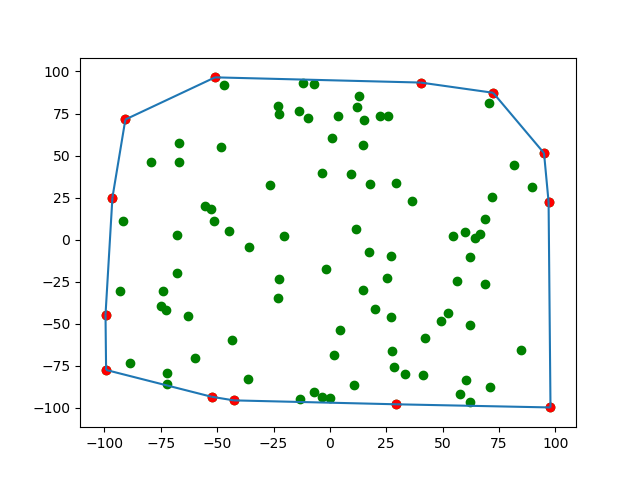

In [9]:
# Jarvis
def get_wrapping_points_idxs(prev_vec, order_list):
    min_angle = 7 # 7 > 2pi
    min_idx = 0
    min_vec = (0, 0)

    for i in range(len(points)):
        prev_x = points[order_list[-1]][0]
        prev_y = points[order_list[-1]][1]
        curr_x = points[i][0]
        curr_y = points[i][1]
        curr_vec = (curr_x-prev_x, curr_y-prev_y)
        curr_angle = get_angle(prev_vec, curr_vec)
        if curr_angle < min_angle and curr_angle != 0:
            min_idx = i
            min_vec = curr_vec
            min_angle = curr_angle

    if min_idx == order_list[0]:
        return order_list
    else:
        order_list.append(min_idx)
        return get_wrapping_points_idxs(min_vec, order_list)

start = time.time()

min_point_idx = get_min_point_idx()
starting_vec = (1, 0)
wrapping_points_idxs = get_wrapping_points_idxs(starting_vec, [min_point_idx])

# print(wrapping_points_idxs)
# for i in range(len(points)):
#     print(i, points[i])
    
wrapping_points = []
for i in range(len(wrapping_points_idxs)):
    wrapping_points.append(points[wrapping_points_idxs[i]])
    
lines = []
for i in range(len(wrapping_points)-1):
    lines.append([wrapping_points[i], wrapping_points[i+1]])
lines.append([wrapping_points[-1], wrapping_points[0]])

end = time.time()
print(end - start)

plot = Plot([PointsCollection(points, color = 'green'),
            PointsCollection(wrapping_points, color = 'red')],
           [LinesCollection(lines)])
plot.draw() 

0.04409313201904297


<IPython.core.display.Javascript object>


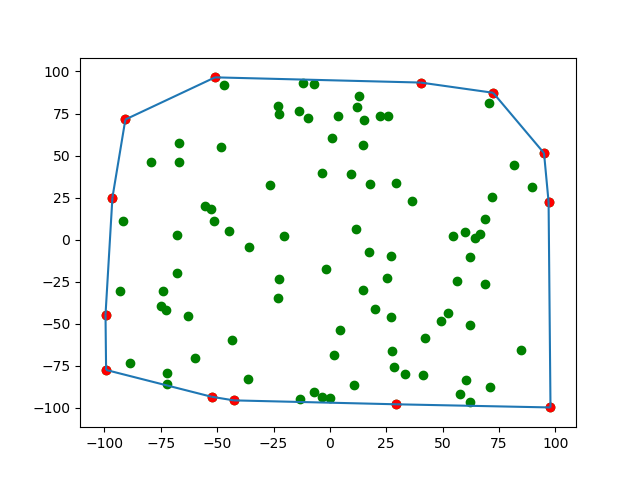

In [8]:
# Graham

start = time.time()

min_point_idx = get_min_point_idx()
starting_vec = (1, 0)

moved_points = []
for i in range(len(points)):
    moved_points.append((points[i][0] - points[min_point_idx][0], points[i][1] - points[min_point_idx][1]))
    
angles = [] # [(angle, distance, index)]
for i in range(len(moved_points)):
    angles.append((get_angle((1,0), moved_points[i]), \
    math.sqrt((moved_points[min_point_idx][0] - \
    moved_points[i][0])**2 + (moved_points[min_point_idx][1] - moved_points[i][1])**2), i))

sorted_angles = sorted(angles)
# for i in range(len(sorted_angles)):
#     print(sorted_angles[i])
# print('--')

s_a_no_collinear = [sorted_angles[0], sorted_angles[1]]
for i in range(len(sorted_angles)):
    if i in [0, 1]: continue
    if sorted_angles[i][0] > s_a_no_collinear[-1][0]:
        s_a_no_collinear.append(sorted_angles[i])
    elif sorted_angles[i][1] > s_a_no_collinear[-1][1]: # angles equals
        s_a_no_collinear[-1] = sorted_angles[i]

# for i in range(len(odl)):
#     print(s_a_no_collinear[i])

sorted_moved_points = []
for i in range(len(s_a_no_collinear)):
    sorted_moved_points.append(moved_points[s_a_no_collinear[i][2]])

def get_matrix_2(a, b, c):
    ax = a[0]
    ay = a[1]
    bx = b[0]
    by = b[1]
    cx = c[0]
    cy = c[1]
    matrix = []
    matrix.append([ax-cx, ay-cy])
    matrix.append([bx-cx, by-cy])
    return matrix

stack = []
stack.append(sorted_moved_points[0])
stack.append(sorted_moved_points[1])
stack.append(sorted_moved_points[2])
i = 3

while i < len(sorted_moved_points):
    m2 = get_matrix_2(stack[len(stack)-2], stack[len(stack)-1], sorted_moved_points[i])
    det_2 = np.linalg.det(m2)
    if det_2 > 0:
        stack.append(sorted_moved_points[i])
        i += 1
    else:
        stack.pop()
# print(stack)

result = []
for i in range(len(stack)):
    result.append((stack[i][0] + points[min_point_idx][0], stack[i][1] + points[min_point_idx][1]))

lines = []
for i in range(len(result)-1):
    lines.append([result[i], result[i+1]])
lines.append([result[-1], result[0]])

end = time.time()
print(end - start)

plot = Plot([PointsCollection(points, color = 'green'),
             PointsCollection(result, color = 'red')],
            [LinesCollection(lines)])
plot.draw() 